# Figures S12 and S13

This notebook loads the data and produces figure S12 and S13.

In [1]:
savedate = '20251031'

In [2]:
data_folder = '' # path to data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None 
from matplotlib.colors import LinearSegmentedColormap
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'

# Load data

In [4]:
df_bg_level = pd.read_csv(data_folder + '23_level_BG_US_imputedquantiles_20250722.zip',dtype={'GEOID':str,'STATEFP':str,'COUNTYFP':str,'BGFIPS':str},index_col=0)
df_bg_level['STATEFP'] = df_bg_level['STATEFP'].str.zfill(2)
df_bg_level['COUNTYFP'] = df_bg_level['COUNTYFP'].str.zfill(5)

# Plot

In [5]:
label_mapping = {}
label_mapping['Column Names'] = {0:'University_college_campuses', 
                                 1:'Weekday_daytime_short_stops', 
                                 2:'City_neighborhoods', 
                                 3:'Weekday_daytime_long_stops', 
                                 4:'Gas_stations_very_short_stops', 
                                 5:'Weekend_evening_recreation', 
                                 6:'High_density_city', 
                                 7:'Hotels'}

label_mapping['Nice Names Short'] = {0: 'University/college\ncampuses',
                                     1: 'Weekday daytime\nshort stops',
                                     2: 'City neighborhoods',
                                     3: 'Weekday daytime\nlong stops',
                                     4: 'Gas stations\nvery short stops',
                                     5: 'Weekend evening\nrecreation',
                                     6: 'City destinations',
                                     7: 'Hotels'}

colours_dict8_v3 = {1:'#006837',
                    3:'#1a9850',
                    5:'#a6d96a',
                    2:'#fdae61',
                    6:'#f46d43',
                    7:'#cb181d',
                    4:'#df65b0',
                    0:'#8073ac'}

cluster_order_numbers8_v3 = [1, 3, 5, 2, 6, 7, 4, 0]
cluster_order_names = [label_mapping['Column Names'][i] for i in cluster_order_numbers8_v3]
cluster_cols = ['no_stations_k8_'+label_mapping['Column Names'][i] for i in range(8)]

## Figure S12 (state-level quantiles)

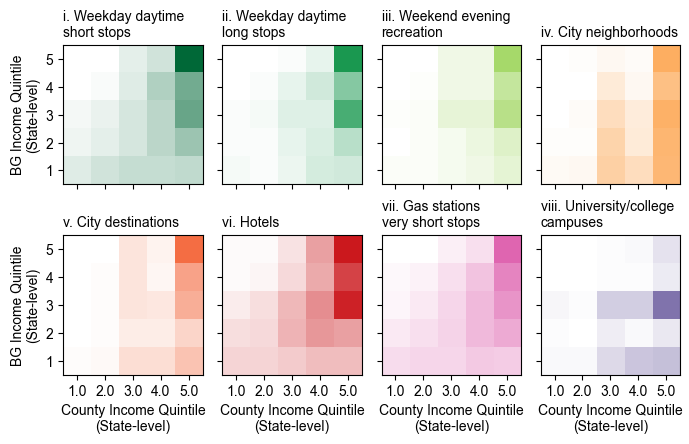

In [6]:
fig, axes = plt.subplots(2, 4, figsize=(7, 4.5), sharex=True, sharey=True)

bg_col = 'income_quantile_bg_state_imputed'
cty_col = 'income_quantile_county_state_imputed'
level = '(State-level)'
figstr = 'Statelevel_imputed'

counter = {0:'i', 1:'ii', 2:'iii', 3:'iv', 4:'v', 5:'vi', 6:'vii', 7:'viii', 8:'ix'}

for row in range(2):
    for col in range(4):
        clustnum = cluster_order_numbers8_v3[4*row + col]
        cluster = 'no_stations_k8_'+cluster_order_names[4*row + col]
        df_heatmap2 = df_bg_level.groupby([bg_col,cty_col])[cluster].sum().reset_index().pivot(index=bg_col, columns=cty_col,values=cluster)
        cm = LinearSegmentedColormap.from_list('Cmap'+str(clustnum), ['white', colours_dict8_v3[clustnum]], N=50)
        im = axes[row, col].imshow(df_heatmap2.loc[[5, 4, 3, 2, 1], :], cmap=cm, vmin=0)

        axes[row, col].set_title(counter[4*row + col] + '. ' + label_mapping['Nice Names Short'][clustnum], 
                                 fontsize=10, loc='left')
        if row == 1:
            axes[row, col].set_xticks(np.arange(0, 5), labels=df_heatmap2.loc[[5, 4, 3, 2, 1], :].columns)
            axes[row, col].set_xlabel('County Income Quintile\n'+level, fontsize=10)
        if col == 0:
            axes[row, col].set_ylabel('BG Income Quintile\n'+level, fontsize=10)
            axes[row, col].set_yticks(np.arange(0, 5), labels=df_heatmap2.loc[[5, 4, 3, 2, 1], :].index)
plt.tight_layout()
plt.savefig('Figures/figureS12_heatmaps_'+figstr+'_'+savedate+'.pdf', bbox_inches='tight', dpi=400)
plt.savefig('Figures/figureS12_heatmaps_'+figstr+'_'+savedate+'.png', bbox_inches='tight', dpi=400)
plt.show()


## Figure S13 (US-level quantiles)

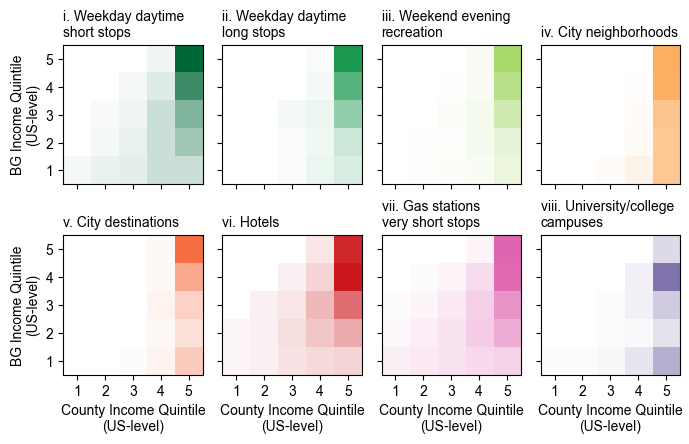

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(7, 4.5), sharex=True, sharey=True)

bg_col = 'income_quantile_bg_US_imputed'
cty_col = 'income_quantile_county_US_imputed'
level = '(US-level)'
figstr = 'USlevel_imputed'

counter = {0:'i', 1:'ii', 2:'iii', 3:'iv', 4:'v', 5:'vi', 6:'vii', 7:'viii', 8:'ix'}

for row in range(2):
    for col in range(4):
        clustnum = cluster_order_numbers8_v3[4*row + col]
        cluster = 'no_stations_k8_'+cluster_order_names[4*row + col]
        df_heatmap2 = df_bg_level.groupby([bg_col,cty_col])[cluster].sum().reset_index().pivot(index=bg_col, columns=cty_col,values=cluster)
        cm = LinearSegmentedColormap.from_list('Cmap'+str(clustnum), ['white', colours_dict8_v3[clustnum]], N=50)
        im = axes[row, col].imshow(df_heatmap2.loc[[5, 4, 3, 2, 1], :], cmap=cm, vmin=0)

        axes[row, col].set_title(counter[4*row + col] + '. ' + label_mapping['Nice Names Short'][clustnum], 
                                 fontsize=10, loc='left')
        if row == 1:
            axes[row, col].set_xticks(np.arange(0, 5), labels=df_heatmap2.loc[[5, 4, 3, 2, 1], :].columns)
            axes[row, col].set_xlabel('County Income Quintile\n'+level, fontsize=10)
        if col == 0:
            axes[row, col].set_ylabel('BG Income Quintile\n'+level, fontsize=10)
            axes[row, col].set_yticks(np.arange(0, 5), labels=df_heatmap2.loc[[5, 4, 3, 2, 1], :].index)
plt.tight_layout()
plt.savefig('Figures/figureS13_heatmaps_'+figstr+'_'+savedate+'.pdf', bbox_inches='tight', dpi=400)
plt.savefig('Figures/figureS13_heatmaps_'+figstr+'_'+savedate+'.png', bbox_inches='tight', dpi=400)
plt.show()
